In [94]:
#Import relevant libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Thesis Data

In [130]:
df = pd.read_excel('../data/DW_Pneumonia_episodios.xls')
print("Number of Columns: ",df.shape[1])
print("Number of Rows: ",df.shape[0])


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  102
Number of Rows:  15355


In [131]:
df.head()

,Key,SourceKey,Idioma,HospitalRegiaoId,HospitalCodigo,ServicoId,DoenteId,DoenteDataNascimento,DoenteIdadeEmAnos,DoenteDecadas,...,NrPrescricoesBroncodilatador,Psicofarmaco,NrPrescricoesPsicofarmaco,Opiaceo,NrPrescricoesOpiaceo,RelaxanteMuscular,NrPrescricoesRelaxanteMuscular,Antibiotico,NrPrescricoesAntibiotico,LineageKey
0,1,3005,PT,3,15,3,2383,1951-09-30,66,7,...,6,0,0,1,2,0,0,1,8,1
1,2,3006,PT,3,15,3,2384,1946-10-23,71,8,...,0,1,1,1,2,1,1,1,5,1
2,3,3012,PT,3,15,3,2390,1964-01-22,54,6,...,4,1,2,1,1,0,0,1,3,1
3,4,3013,PT,3,15,1,2391,1956-05-31,61,7,...,0,1,1,1,2,1,3,1,4,1
4,5,3019,PT,3,15,2,2397,1944-07-20,73,8,...,1,0,0,0,0,0,0,1,4,1


In [132]:
df_saps = pd.read_excel('../data/DW_Pneumonia_SAPS.xls')
print("Number of Columns: ",df_saps.shape[1])
print("Number of Rows: ",df_saps.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  30
Number of Rows:  12949


In [133]:
df_diagn = pd.read_excel('../data/DW_Pneumonia_Diagnosticos.xls')
print("Number of Columns: ",df_diagn.shape[1])
print("Number of Rows: ",df_diagn.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  3
Number of Rows:  62955


In [134]:
df_antecedent = pd.read_excel('../data/DW_Pneumonia_Antecedentes_Diagn.xls')
print("Number of Columns: ",df_antecedent.shape[1])
print("Number of Rows: ",df_antecedent.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  3
Number of Rows:  14132


In [135]:
df_dpoc = pd.read_excel('../data/DW_Pneumonia_DPOC_Diagn.xls')
print("Number of Columns: ",df_dpoc.shape[1])
print("Number of Rows: ",df_dpoc.shape[0])

Number of Columns:  2
Number of Rows:  8


In [136]:
df_ins_renalI = pd.read_excel('../data/DW_Pneumonia_InsufRenal_Diagn.xls')
print("Number of Columns: ",df_ins_renalI.shape[1])
print("Number of Rows: ",df_ins_renalI.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  2
Number of Rows:  121


In [137]:
df_ins_renalII = pd.read_excel('../data/DW_Pneumonia_InsufRenal_II_Diagn.xls')
print("Number of Columns: ",df_ins_renalII.shape[1])
print("Number of Rows: ",df_ins_renalII.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  2
Number of Rows:  179


In [138]:
df_ins_renal = pd.concat([df_ins_renalI, df_ins_renalII])

In [139]:
df_enfisema = pd.read_excel('../data/DW_Pneumonia_EnfisemaPulm_Diagn.xls')
print("Number of Columns: ",df_enfisema.shape[1])
print("Number of Rows: ",df_enfisema.shape[0])

Number of Columns:  2
Number of Rows:  9


In [140]:
df_bronquiteI = pd.read_excel('../data/DW_Pneumonia_Bronquite_I_Diagn.xls')
print("Number of Columns: ",df_bronquiteI.shape[1])
print("Number of Rows: ",df_bronquiteI.shape[0])

Number of Columns:  2
Number of Rows:  8


In [141]:
df_bronquiteII = pd.read_excel('../data/DW_Pneumonia_Bronquite_II_Diagn.xls')
print("Number of Columns: ",df_bronquiteII.shape[1])
print("Number of Rows: ",df_bronquiteII.shape[0])

Number of Columns:  2
Number of Rows:  11


In [142]:
df_bronquite = pd.concat([df_bronquiteI, df_bronquiteII])

In [143]:
df_doenca_resp = pd.read_excel('../data/DW_Pneumonia_Doenca_respiratoria.xls')
print("Number of Columns: ",df_doenca_resp.shape[1])
print("Number of Rows: ",df_doenca_resp.shape[0])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Number of Columns:  7
Number of Rows:  115


## Data preprocessing

In [144]:
"""
    Get only some features
"""
# Convert the dictionary into DataFrame
df_v2 = pd.DataFrame()
df_v2 = pd.DataFrame({'TipoAdmissaoId': df['TipoAdmissaoId']})
df_v2['DoenteIdadeEmAnos']=df['DoenteIdadeEmAnos']
df_v2['TipoProvenienciaId']=df['TipoProvenienciaId']
df_v2['ServicoId']=df['ServicoId']
df_v2['DoenteSexoId']=df['DoenteSexoId']
df_v2['IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar']=df['IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar']
df_v2['SAPSScore']=df['SAPSScore']
df_v2['APACHEScore']=df['APACHEScore']

In [145]:
"""
    Add the PaoFio Ratio to Episodes
"""
def addPaoFioRatio():
    df_v2['PaoFioRatio'] = np.nan
    for i in df['Key']:
        eps_list = list(df_saps['EpisodioKey'])
        if i in eps_list:
            _index = eps_list.index(i)
            df_v2.at[i-1,'PaoFioRatio']=df_saps['PaoFio'][_index]

    #df_v2 = df_v2[df_v2['PaoFioRatio'].notna()]

In [146]:
"""
    Check DPOC Diagnosis
"""
def addDPOC():
    df_v2['DPOC'] = 0
    for i in df['Key']:
        ep_query = df_diagn.loc[df_diagn['EpisodioKey'] == i]
        diagnisticos = list(ep_query["DiagnosticoId"])
        dpoc_ids = list(df_dpoc["Key"])
        for d in diagnisticos:
            if d in dpoc_ids:
                df_v2.at[i-1,'DPOC']='1'

In [147]:
"""
    Check antecedentes de Inuficiencia Renal Diagnosis
"""
def addInsufRenal():
    df_v2['InsufRenal'] = 0
    for i in df['Key']:
        ep_query = df_antecedent.loc[df_antecedent['EpisodioKey'] == i]
        diagnisticos = list(ep_query["DiagnosticoId"])
        ins_renal_ids = list(df_ins_renal["Key"])
        for d in diagnisticos:
            if d in ins_renal_ids:
                df_v2.at[i-1,'InsufRenal']='1'

In [148]:
"""
    Check Bronquite Diagnosis
"""
def addBonquite():
    df_v2['Bonquite'] = 0
    for i in df['Key']:
        ep_query = df_diagn.loc[df_diagn['EpisodioKey'] == i]
        diagnisticos = list(ep_query["DiagnosticoId"])
        bronquite_ids = list(df_bronquite["Key"])
        for d in diagnisticos:
            if d in bronquite_ids:
                df_v2.at[i-1,'Bonquite']='1'

In [149]:
"""
    Check Enfisema Diagnosis
"""
def addEnfisema():
    df_v2['Enfisema'] = 0
    for i in df['Key']:
        ep_query = df_diagn.loc[df_diagn['EpisodioKey'] == i]
        diagnisticos = list(ep_query["DiagnosticoId"])
        enfisema_ids = list(df_enfisema["Key"])
        for d in diagnisticos:
            if d in enfisema_ids:
                df_v2.at[i-1,'Enfisema']='1'

In [150]:
"""
    Check Doenca do Sistema Respiratorio Diagnosis
"""
def addDoencaRespiratoria():
    df_v2['DoencaRespiratoria'] = 0
    for i in df['Key']:
        ep_query = df_diagn.loc[df_diagn['EpisodioKey'] == i]
        diagnisticos = list(ep_query["DiagnosticoId"])
        doenca_resp_ids = list(df_doenca_resp["Key"])
        for d in diagnisticos:
            if d in doenca_resp_ids:
                df_v2.at[i-1,'DoencaRespiratoria']='1'

In [151]:
"""
    Check antecedentes de Doenca do Sistema Respiratorio Diagnosis
"""
def addDoencaRespiratoriaAntec():
    df_v2['DoencaRespiratoriaAntec'] = 0
    for i in df['Key']:
        ep_query = df_antecedent.loc[df_antecedent['EpisodioKey'] == i]
        diagnisticos = list(ep_query["DiagnosticoId"])
        doenca_resp_ids = list(df_doenca_resp["Key"])
        for d in diagnisticos:
            if d in doenca_resp_ids:
                df_v2.at[i-1,'DoencaRespiratoriaAntec']='1'

In [152]:
"""
    Add variables
"""
addPaoFioRatio()              # Ratio of PaO2FiO2
addDPOC()                     # Doença pulmonar obstrutiva cronica
addInsufRenal()               # Insuficiência renal
addBonquite()                 # Bronquite
addEnfisema()                 # Enfisema pulmonar
addDoencaRespiratoria()       # Doença do sistema respiratório
#addDoencaRespiratoriaAntec()  # Antecedentes de doenças do sistema respiratório

In [153]:
"""
    Add outcome variable
"""
#df_v2 = df_v2.drop('NumeroDiasVentilacaoInvasiva', axis=1)
df_v2['NumeroDiasVentilacaoInvasiva']=df['NumeroDiasVentilacaoInvasiva']

In [154]:
"""
    Consider only patients who were submitted to IMV  - 7490 admissions
"""
df_v2 = df_v2[df_v2['NumeroDiasVentilacaoInvasiva'] > 0]  

In [1]:
#df_v2.describe()

#### Data Visualization

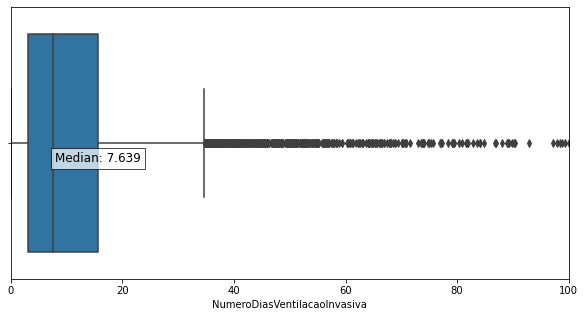

In [121]:
"""
    Box plot - Tempo de Internamento
"""
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.xlabel('IMV')
sns.boxplot(x=df_v2['NumeroDiasVentilacaoInvasiva'])
 
_median = np.median(df_v2['NumeroDiasVentilacaoInvasiva'])

plt.text(8, 0.07,
         str('Median: '+str(round(_median, 3))),
         bbox=dict(facecolor='white',
                   alpha=0.7),
         fontsize=12)

plt.show()

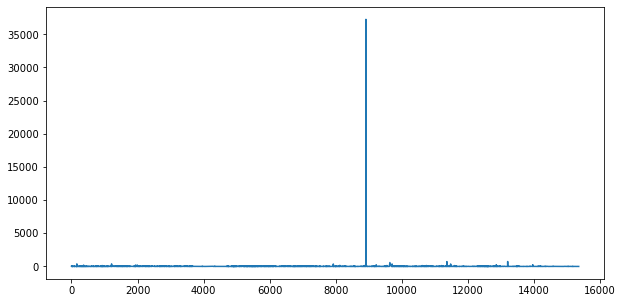

In [156]:
plt.figure(figsize=(10,5))
plt.plot(df_v2['NumeroDiasVentilacaoInvasiva'])

### Filter the values (Outliers)

In [157]:
"""
    NumeroDiasVentilacaoInvasiva < 30
    
"""
df_v2 = df_v2[df_v2['NumeroDiasVentilacaoInvasiva'] < 30]  
print("Number of Columns: ",df_v2.shape[1])
print("Number of Rows: ",df_v2.shape[0])

Number of Columns:  15
Number of Rows:  6798


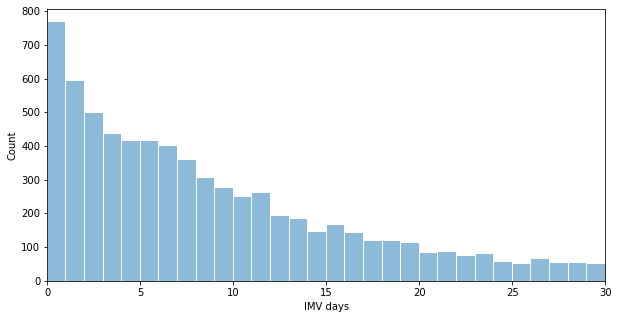

In [158]:
"""
    Density plot - Tempo de Internamento
"""
plt.figure(figsize=(10,5))
plt.xlim(0,30)
plt.xlabel('IMV days')
plt.ylabel('Count')
plt.hist(df_v2['NumeroDiasVentilacaoInvasiva'], alpha=0.5,bins=30, rwidth = 0.95)
plt.show()

In [159]:
"""
    Deal with missing values
"""
print(df_v2.isnull().sum())  

# Remove rows with missing values
df_v2.dropna(axis=0, inplace=True)
print("Number of Rows: ",df_v2.shape[0])

TipoAdmissaoId                                            35
DoenteIdadeEmAnos                                          0
TipoProvenienciaId                                         0
ServicoId                                                  0
DoenteSexoId                                               0
IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar    201
SAPSScore                                                442
APACHEScore                                              442
PaoFioRatio                                              600
DPOC                                                       0
InsufRenal                                                 0
Bonquite                                                   0
Enfisema                                                   0
DoencaRespiratoria                                         0
NumeroDiasVentilacaoInvasiva                               0
dtype: int64
Number of Rows:  6009


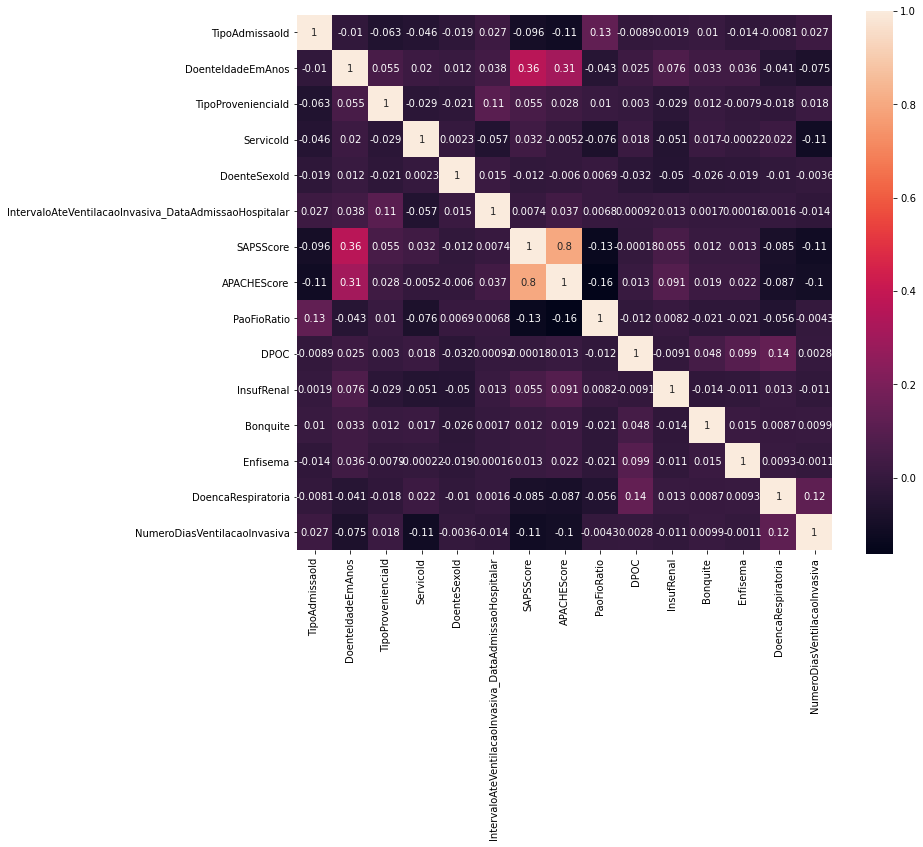

In [161]:
"""
    Correlation Matrix 
""" 
plt.figure(figsize=(12,10))
cor = df_v2.corr()
sns.heatmap(cor,vmax=1,square=True,annot=True)
plt.show()

In [9]:
"""
    Extract a sample of total data

df_final = df_v2.sample(frac=0.1)

#df_final = df_v2

y = df_final.values[:,-1].astype(float)
X = df_final.values[:,:-1].astype(float)

print(f"Features: {len(X[0])}")
print(f"Examples: {len(X)}")"""

Features: 8
Examples: 1294


In [162]:
"""
    Get Variables
"""
y = df_v2.values[:,-1].astype(float) # df_v2['NumeroDiasVentilacaoInvasiva']
X = df_v2.values[:,:-1].astype(float)

print(f"Features: {len(X[0])}")
print(f"Examples: {len(X)}")

Features: 14
Examples: 6009


### Feature Importance

In [163]:
"""
    Permutation importance
"""
def get_permutation_importance(X, y, model,colnames):
    result = permutation_importance(model, X, y, n_repeats=1,
                                random_state=0)
    
    # permutational importance results
    result_df = pd.DataFrame(colnames,  columns=['Feature'])
    result_df['permutation_importance'] = result.get('importances')
    
    return result_df

In [165]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

colnames = list(df_v2.columns)[:-1]
permutate_df = get_permutation_importance(X, y, model, colnames)
permutate_df.sort_values('permutation_importance', 
                   ascending=False)[
                                    ['Feature','permutation_importance'
                                    ]
                                  ][:30].style.background_gradient(cmap='Blues')

,Feature,permutation_importance
3,ServicoId,0.630511
6,SAPSScore,0.395157
5,IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar,0.363438
8,PaoFioRatio,0.356279
1,DoenteIdadeEmAnos,0.353915
7,APACHEScore,0.285382
13,DoencaRespiratoria,0.119903
2,TipoProvenienciaId,0.109891
0,TipoAdmissaoId,0.087865
4,DoenteSexoId,0.044984


In [93]:
"""
    Linear Regression importance
"""
def rfe_select_featurs(X, y, estimator, num_features):
    rfe_selector = RFE(estimator=estimator, 
                       n_features_to_select=num_features, 
                       step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    
    return rfe_feature

In [97]:
# total list of features
colnames = list(df_v2.columns)[:-1]
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [104]:
model = Lasso()

rfe = RFE(model, n_features_to_select=5, verbose =3 )
rfe.fit(X, y)
ranks["RFE_LR"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [105]:
# all ranks
# Put the mean scores into a Pandas dataframe
rfe_lr_df = pd.DataFrame(list(ranks['RFE_LR'].items()), columns= ['Feature','rfe_importance'])

all_ranks = rfe_lr_df

display(all_ranks.head(10))

,Feature,rfe_importance
0,TipoAdmissaoId,0.00
1,IntervaloAteVentilacaoInvasiva_DataAdmissaoHos...,1.00
2,APACHEScore,1.00
3,SAPSScore,1.00
4,PaoFioRatio,1.00
5,DPOC,0.17
6,InsufRenal,0.33
7,Bonquite,0.50
8,Enfisema,0.67
9,DoencaRespiratoria,0.83


['TipoAdmissaoId', 'DoenteIdadeEmAnos', 'TipoProvenienciaId', 'ServicoId', 'DoenteSexoId', 'IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar', 'SAPSScore', 'APACHEScore', 'PaoFioRatio', 'DPOC', 'InsufRenal', 'Bonquite', 'Enfisema', 'DoencaRespiratoria', 'NumeroDiasVentilacaoInvasiva']


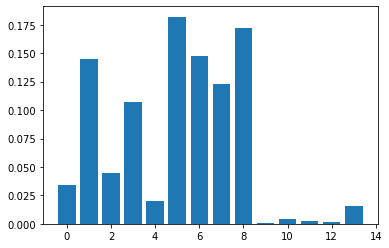

In [167]:
"""
    RF importance
"""
features_names = list(df_v2.columns)
print(features_names)

# define the model
model = RandomForestRegressor(max_depth = 110, n_estimators = 1000)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
     #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

['TipoAdmissaoId', 'DoenteIdadeEmAnos', 'IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar', 'SAPSScore', 'APACHEScore', 'PaoFioRatio', 'DPOC', 'InsufRenal', 'Bonquite', 'Enfisema', 'DoencaRespiratoria', 'NumeroDiasVentilacaoInvasiva']


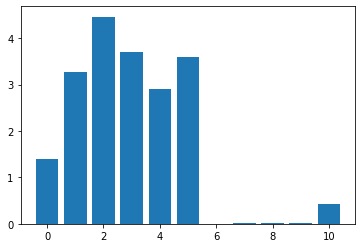

In [49]:
"""
    RF importance
"""
features_names = list(df_v3.columns)
print(features_names)# fit the model

# define the model
model = RandomForestRegressor(max_depth = 110, n_estimators = 1000)
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

['TipoAdmissaoId', 'DoenteIdadeEmAnos', 'IntervaloAteVentilacaoInvasiva_DataAdmissaoHospitalar', 'SAPSScore', 'APACHEScore', 'PaoFioRatio', 'DPOC', 'InsufRenal', 'Bonquite', 'Enfisema', 'DoencaRespiratoria', 'NumeroDiasVentilacaoInvasiva']


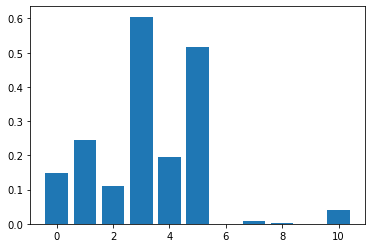

In [50]:
"""
    RF importance
"""
features_names = list(df_v2.columns)
print(features_names)# fit the model

# define the model
model = MLPRegressor(solver='adam',   #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=0.0001,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(32, 12), 
                   activation='tanh', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   learning_rate = 'constant',
                    max_iter=2000)
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Split data to test

In [168]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Examples to train: {}".format(len(X_train)))

Examples to train: 4807


# Models Validation

### GridSearchCV to get the best hyperparameters   |  Cross-validation with 4 folds   

## Deep Learning model

In [238]:
"""
    Tune Batch Size and Number of Epochs
"""
def dl_model():       #Best: {'batch_size': 10, 'epochs': 100}
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=len(X_train[0]), activation='relu'))
    # Output layer
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4)

grid_result = dl_grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ValueError: 
All the 21 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joaoc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joaoc\anaconda3\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "C:\Users\joaoc\anaconda3\lib\site-packages\scikeras\wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\joaoc\anaconda3\lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\joaoc\anaconda3\lib\site-packages\scikeras\wrappers.py", line 431, in _build_keras_model
    model = final_build_fn(**build_params)
TypeError: create_model() got an unexpected keyword argument 'optimizer'


In [241]:
"""
    Tune the Training Optimization Algorithm     Best {'optimizer': 'Adamax'}
"""
def dl_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=len(X_train[0]), activation='relu'))
    # Output layer
    model.add(Dense(1, activation='linear'))
    # return model without compile
    return model


# create model
model = KerasRegressor(model=dl_model, loss="mean_squared_error", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -1.200725 using {'optimizer': 'Adamax'}


In [248]:
"""
    Tune the Neuron Activation Function     Best {'model__activation': 'sigmoid'}
"""
def dl_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=len(X_train[0]), activation=activation))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = dl_grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.007756 using {'model__activation': 'sigmoid'}


In [91]:
"""
    Tune the Number of Neurons in the Hidden Layer     Best {'model__neurons': 30}
"""
def dl_model(neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=len(X_train[0]), activation='sigmoid'))
    model.add(Dense(neurons, input_dim=len(X_train[0]), activation='sigmoid'))
    model.add(Dense(neurons, input_dim=len(X_train[0]), activation='sigmoid'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4)
grid_result = dl_grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.011220 using {'model__neurons': 30}


In [ ]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

In [ ]:
plt.plot(scores_rf)
plt.scatter([scores_rf.index(best_score_rf)],[best_score_rf], color = 'red')
plt.ylabel('Score value')
plt.show()

## Artificial Neural Network

In [217]:
"""
    Define our candidate hyperparameters     
"""

nn_model = MLPRegressor()

hp_candidates_mlp = {'hidden_layer_sizes': [8,16,(8,8), (16,16), (32,32)],
          'activation': ['relu','tanh'],
          'alpha': [0.0001, 0.01, 0.001],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

nn_grid = GridSearchCV(estimator = nn_model, param_grid = hp_candidates_mlp, 
                          cv = 4, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
nn_grid.fit(X_train, y_train)
best_nn_params = nn_grid.best_params_

            
print("Best: ",best_nn_params)   #Best:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 6), 'learning_rate': 'constant', 'solver': 'adam'}

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 12), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

In [ ]:
plt.plot(scores_rf)
plt.scatter([scores_rf.index(best_score_rf)],[best_score_rf], color = 'red')
plt.ylabel('Score value')
plt.show()

## Random Forest

In [306]:
"""
    Define candidate hyperparameters
"""
#hp_candidates_rf = {'n_estimators': [10, 50, 100, 200], 'max_depth': [3,10,80, 90, 110]}

hp_candidates_rf = {
    'max_depth': [80, 90, 100, 110],
    
    'n_estimators': [100, 200, 300, 1000]
}
#'min_samples_leaf': [3, 4, 5],
#'min_samples_split': [8, 10, 12],


# Instantiate the grid search model
rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator = rf, param_grid = hp_candidates_rf,
                           scoring='r2',
                          cv = 4, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
rf_grid.fit(X_train, y_train)
best_rf_params = rf_grid.best_params_
            
print("Best: ",best_rf_params)  #Best:  {'max_depth': 110, 'n_estimators': 1000}

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best:  {'max_depth': 90, 'n_estimators': 300}


In [310]:
scores_rf = list(rf_grid.cv_results_['mean_test_score'])
best_score_rf = rf_grid.best_score_

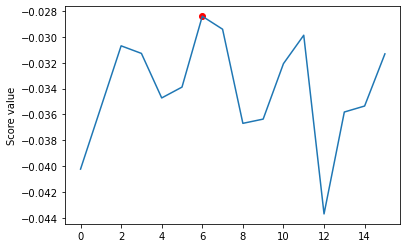

In [312]:
plt.plot(scores_rf)
plt.scatter([scores_rf.index(best_score_rf)],[best_score_rf], color = 'red')
plt.ylabel('Score value')
plt.show()

### Linear Regression

In [316]:
"""
    Define our candidate hyperparameters - Lasso    
"""
lasso_model = Lasso()
hp_candidates_lasso = {'alpha': [0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001]}

lasso_grid = GridSearchCV(lasso_model, # model
            param_grid = hp_candidates_lasso, # hyperparameters
            scoring='neg_mean_squared_error', # metric for scoring
            cv=4,
            n_jobs=-1, error_score='raise', verbose=3)
        
lasso_grid.fit(X_train, y_train)
best_lasso_params = lasso_grid.best_params_
            
print("Best: ",best_lasso_params)   #Best:  {'mspe': 6277.783269404937, 'candidates': 0.5}

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best:  {'alpha': 0.01}


In [317]:
scores_lasso = list(lasso_grid.cv_results_['mean_test_score'])
best_score_lasso = lasso_grid.best_score_

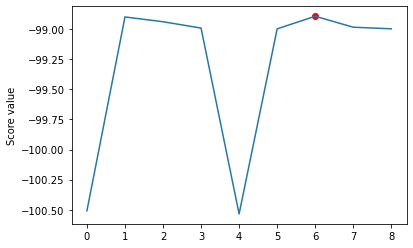

In [318]:
plt.plot(scores_lasso)
plt.scatter([scores_lasso.index(best_score_lasso)],[best_score_lasso], color = 'red')
plt.ylabel('Score value')
plt.show()

In [139]:
"""
    Linear Regression   
"""
lr_model = LinearRegression()
hp_candidates_lr = {}

lr_grid = GridSearchCV(regressor, # model
            param_grid = hp_candidates_lr, # hyperparameters
            scoring='neg_mean_absolute_error', # metric for scoring
            cv=4,
            n_jobs=-1, error_score='raise', verbose=3)
        
lr_grid.fit(X_train, y_train)
best_lr_params = lr_grid.best_params_

print("Best: ",best_lr_params)   #Best:  {'mspe': 6277.783269404937, 'candidates': 0.5}

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best:  {}


## Results Comparison

In [173]:
"""
    Define base model    -   This network configuration is based on literature
""" 
def dl():
    # create model
    model = Sequential()
    
    model.add(Dense(59, input_dim=len(X_train[0])))
    
    model.add(Dense(128, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(256, activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics = ['mae'])
    return model

In [174]:
"""
    Deep Learning - Best Hyper-parameters(literature)
"""
X_train_dl=np.asarray(X_train).astype(int)
y_train_dl=np.asarray(y_train).astype(int)
X_test_dl=np.asarray(X_test).astype(int)
y_test_dl=np.asarray(y_test).astype(int)

model_dl = dl()
history = model_dl.fit(X_train_dl, y_train_dl,
                        validation_data=(X_test_dl, y_test_dl),
                        epochs=50)
y_predicted_dl = model_dl.predict(X_test_dl)
y_predicted_dl = [i[0].astype(float) for i in y_predicted_dl]
        
mape_dl = round(mean_absolute_percentage_error(y_test, y_predicted_dl) * 100, 3)
mspe_dl = round(np.mean(np.square(((y_test - y_predicted_dl) / y_test)), axis=0) * 100, 3)
r2_dl = round(r2_score(y_test,y_predicted_dl), 3)

Epoch 1/50
151/151 [==============================] - 2s 9ms/step - loss: 71.0677 - mae: 6.4523 - val_loss: 59.1922 - val_mae: 5.9272
Epoch 2/50
151/151 [==============================] - 1s 6ms/step - loss: 58.2178 - mae: 6.0591 - val_loss: 58.8067 - val_mae: 6.1520
Epoch 3/50
151/151 [==============================] - 1s 5ms/step - loss: 57.6558 - mae: 6.0028 - val_loss: 64.8603 - val_mae: 6.6771
Epoch 4/50
151/151 [==============================] - 1s 6ms/step - loss: 57.6114 - mae: 6.0178 - val_loss: 57.3042 - val_mae: 6.0208
Epoch 5/50
151/151 [==============================] - 1s 5ms/step - loss: 56.0678 - mae: 5.9565 - val_loss: 57.2431 - val_mae: 6.1555
Epoch 6/50
151/151 [==============================] - 1s 5ms/step - loss: 55.6439 - mae: 5.9474 - val_loss: 57.0859 - val_mae: 6.1065
Epoch 7/50
151/151 [==============================] - 1s 6ms/step - loss: 55.2839 - mae: 5.9392 - val_loss: 58.2452 - val_mae: 5.7831
Epoch 8/50
151/151 [==============================] - 1s 6ms/s

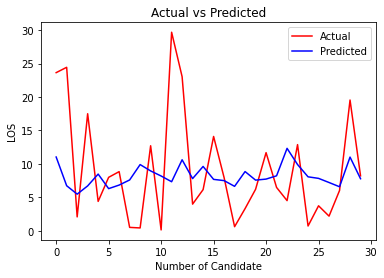

In [175]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_predicted_dl[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

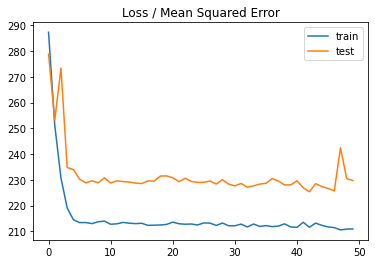

In [161]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [90]:
"""
    MLPRegressor - Best Hyper-parameters  | {'activation': 'tanh', 'alpha': 0.0001
                            , 'hidden_layer_sizes': (32, 12), 'learning_rate': 'constant', 'solver': 'adam'}
"""

final_mlp = MLPRegressor(solver='adam',   #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=0.0001,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(8, 8), 
                   activation='tanh', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   learning_rate = 'constant',
                    max_iter=2000)

final_mlp.fit(X_train, y_train)
y_pred_mlp = final_mlp.predict(X_test)

mape_mlp = round(mean_absolute_percentage_error(y_test, y_pred_mlp) * 100, 3)
mspe_mlp = round(np.mean(np.square(((y_test - y_pred_mlp) / y_test)), axis=0) * 100, 3)
r2_mlp = round(r2_score(y_test,y_pred_mlp), 3)
r2_mlp

-0.004

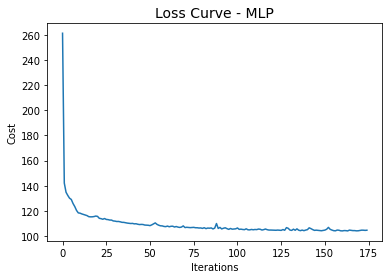

In [163]:
plt.plot(final_mlp.loss_curve_)
plt.title("Loss Curve - MLP", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

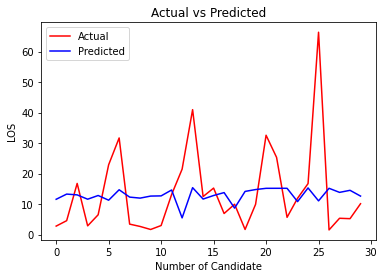

In [219]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_pred_mlp[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [169]:
"""
    Random Forest - Best Hyper-parameters
"""

r_forest_final = RandomForestRegressor(n_estimators=100, max_depth=110)

r_forest_final.fit(X_train, y_train)
y_pred_rf = r_forest_final.predict(X_test)

mape_rf = round(mean_absolute_percentage_error(y_test, y_pred_rf) * 100, 3)
mspe_rf = round(np.mean(np.square(((y_test - y_pred_rf) / y_test)), axis=0) * 100, 3)
r2_rf = round(r2_score(y_test,y_pred_rf), 3)
print(r2_rf)
for i in range(20):
    print(y_test[i], " --- ", y_pred_rf[i])

0.05
23.63403  ---  10.478055600000005
24.43333  ---  12.4975375
2.06389  ---  5.005573100000002
17.49039  ---  6.3089754000000005
4.38194  ---  9.5464666
7.98125  ---  7.158670000000006
8.83194  ---  10.637414700000004
0.49583  ---  8.5271405
0.41319  ---  9.7596108
12.70208  ---  7.6114488
0.11736  ---  10.095617300000004
29.67569  ---  6.46123
23.02778  ---  14.837472800000006
3.975  ---  9.0195344
6.14236  ---  8.2050808
14.09167  ---  7.7259344999999975
7.94375  ---  9.243262599999998
0.59931  ---  7.961202800000001
3.30625  ---  12.489136099999994
6.18958  ---  7.626205699999999


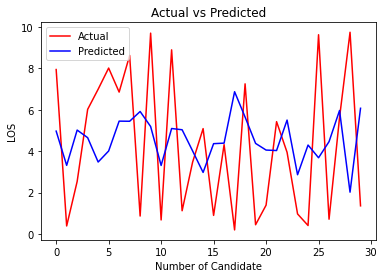

In [92]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_pred_rf[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [170]:
"""
    Linear Regression - Best Hyper-parameters
"""

final_linear = Lasso(alpha=0.01)

final_linear.fit(X_train, y_train)
y_pred_linear = final_linear.predict(X_test)

mape_linear = round(mean_absolute_percentage_error(y_test, y_pred_linear) * 100, 3)
mspe_linear = round(np.mean(np.square(((y_test - y_pred_linear) / y_test)), axis=0) * 100, 3)
r2_linear = round(r2_score(y_test,y_pred_linear), 3)
print(r2_linear)

0.028


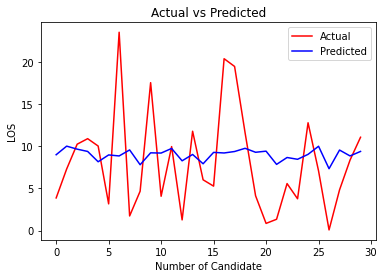

In [230]:
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(y_test[:30], color = 'red', label = 'Actual')
plt.plot(y_pred_linear[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### Results visualization

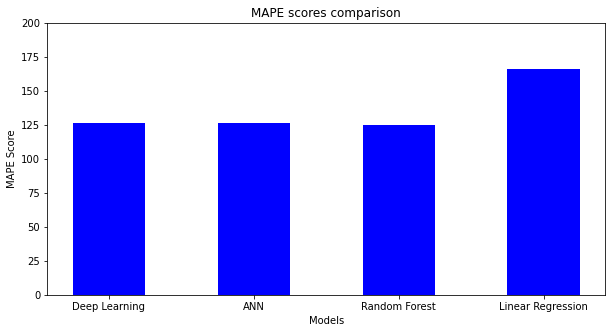

In [30]:
"""
    Compare MAPE scores
"""

values = [mape_dl, mape_mlp, mape_rf, mape_linear]
models = ["Deep Learning", "ANN", "Random Forest", "Linear Regression"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='blue',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MAPE Score")
plt.title("MAPE scores comparison")
plt.ylim(0,200)
plt.show()

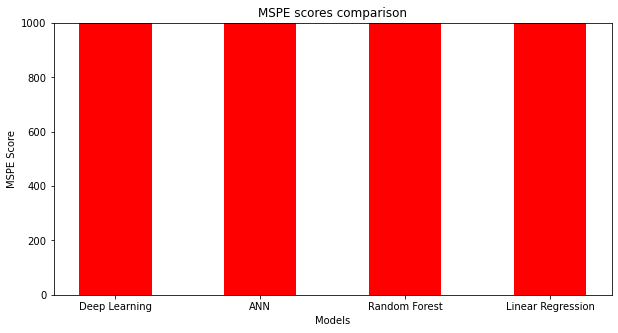

In [31]:
"""
    Compare MSPE scores
"""

values = [mspe_dl, mspe_mlp, mspe_rf, mspe_linear]
models = ["Deep Learning", "ANN", "Random Forest", "Linear Regression"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='red',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MSPE Score")
plt.title("MSPE scores comparison")
plt.ylim(0,1000)
plt.show()

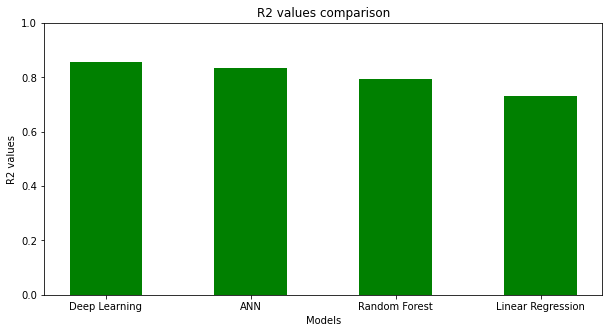

In [32]:
"""
    Compare R2 values
"""

values = [r2_dl, r2_mlp, r2_rf, r2_linear]
models = ["Deep Learning", "ANN", "Random Forest", "Linear Regression"]

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("R2 values")
plt.title("R2 values comparison")
plt.ylim(0.0,1)
plt.show()

In [33]:
columns = ('R2', 'MAPE', 'MSPE')
rows = ['DL', 'ANN', 'RF', 'LR']
data = [[r2_dl, mape_dl, mspe_dl],
        [r2_mlp, mape_mlp, mspe_mlp],
        [r2_rf, mape_rf, mspe_rf], 
        [r2_linear, mape_linear, mspe_linear]]

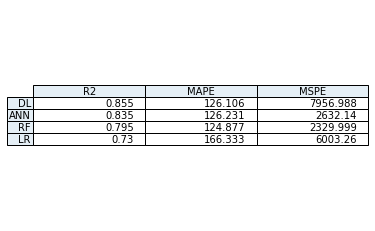

In [34]:
rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
ccolors = plt.cm.BuPu(np.full(len(data), 0.1))

fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = data,  
    rowLabels = rows,  
    colLabels = columns, 
    rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      loc='center')         
   
ax.set_title('', 
             fontweight ="bold") 
   
plt.show() 